# Imports

In [335]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
import scipy.stats as stats

# Loading Dataset

In [336]:
# header = 3 allows pd to read it from where the data originally starts
ghg_data = pd.read_excel("raw_data/atmoshpericemissionsghg.xlsx", header = 3, sheet_name = "GHG total ")

# Preprocessing

**Data includes 2 different tables in one sheet. Let's separate them**

In [337]:
ghg_indus_grp = ghg_data.loc[:22]
ghg_indus_sec_grp = ghg_data.loc[26:158]

## Preprocessing ghg_indus_grp¶
**Let's work the on ghg_indus_grp dataframe**

In [338]:
ghg_indus_grp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,A,NaN,"Agriculture, forestry and fishing",55978.4,55808.5,55510.4,54725.4,55487.3,55391.7,56706.2,...,49671.9,48613.5,50571.8,51146.3,50534.4,51286.5,50557.7,50060.2,48500.2,50040.0
1,B,NaN,Mining and quarrying,50762.1,50877.2,51480.6,51092.0,44876.2,46739.8,46903.0,...,22281.0,20953.7,20887.3,22201.0,21100.3,21031.1,20790.9,20736.3,19135.7,17181.4
2,C,NaN,Manufacturing,176067.9,177032.4,170118.3,165079.3,168003.9,166085.4,167363.6,...,89688.4,92323.8,91436.1,88752.1,84312.4,85314.2,84017.6,83794.9,80927.2,81593.9
3,D,NaN,"Electricity, gas, steam and air conditioning s...",217638.6,214348.2,202484.4,185006.1,180725.0,178167.0,177971.4,...,178586.4,169386.4,148443.9,132014.9,110073.4,99866.9,95829.7,89371.3,80310.9,86080.9
4,E,NaN,"Water supply; sewerage, waste management and r...",75232.5,76756.7,76870.8,77189.4,77556.2,78634.3,79137.0,...,32164.5,29286.8,27392.9,27221.5,27117.4,28111.6,28407.5,27934.3,26552.4,26551.4


**Drop Unnamed: 1 and rename the remaining columns**

In [339]:
ghg_indus_grp.rename(columns = {"Unnamed: 0": "Letter code", "Unnamed: 2": "Industry"}, inplace = True)
del ghg_indus_grp["Unnamed: 1"]

/var/folders/45/qc4989c57zlbtkmp2cnnpcfc0000gn/T/ipykernel_98520/584093540.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Understand your dataframe using .info()**

In [340]:
ghg_indus_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Letter code  21 non-null     object 
 1   Industry     22 non-null     object 
 2   1990         22 non-null     object 
 3   1991         22 non-null     float64
 4   1992         22 non-null     float64
 5   1993         22 non-null     float64
 6   1994         22 non-null     float64
 7   1995         22 non-null     float64
 8   1996         22 non-null     float64
 9   1997         22 non-null     float64
 10  1998         22 non-null     float64
 11  1999         22 non-null     float64
 12  2000         22 non-null     float64
 13  2001         22 non-null     float64
 14  2002         22 non-null     float64
 15  2003         22 non-null     float64
 16  2004         22 non-null     float64
 17  2005         22 non-null     float64
 18  2006         22 non-null     float64
 19  2007      

**Let's take out the null rows**

In [341]:
ghg_indus_grp.drop(21, inplace = True)

/var/folders/45/qc4989c57zlbtkmp2cnnpcfc0000gn/T/ipykernel_98520/1619219843.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [342]:
ghg_indus_grp.reset_index(inplace = True)

**Delete the original index since a new one has been created**

In [343]:
del ghg_indus_grp["index"]

**Reassigning consumer with a letter code (from - to "U")**

In [344]:
ghg_indus_grp.loc[20, "Letter code"] = "U"

In [345]:
ghg_indus_grp.tail()

,Letter code,Industry,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
17,R,"Arts, entertainment and recreation",1797.7,1885.4,1712.9,1793.5,1739.3,1737.8,1793.2,1629.0,...,1068.9,1059.3,979.0,1011.2,1035.8,1022.2,1007.7,1002.6,880.0,954.8
18,S,Other service activities,1162.8,1251.9,1191.3,1249.9,1241.8,1272.8,1326.1,1216.1,...,989.6,995.8,916.5,978.8,1004.7,987.8,976.0,970.9,847.4,917.5
19,T,Activities of households as employers; undiffe...,76.3,75.1,76.8,78.2,81.9,83.4,81.6,84.3,...,47.3,41.9,46.4,42.5,51.6,46.2,47.6,47.7,31.5,40.7
20,U,Consumer expenditure,143893.7,152359.2,150676.4,155426.7,150210.3,144708.1,159770.4,153848.3,...,146065.1,148147.5,136001.5,139976.4,142422.1,141389.9,144174.1,140918.0,125152.7,134761.9
21,NaN,Total greenhouse gas emissions,842944.6,852556.5,833417.1,815888.8,804929.0,800882.1,827193.7,811315.7,...,656182.9,642592.4,610966.9,600621.2,578877.3,563160.3,564144.5,550583.8,488596.4,502786.6


### Processing Total¶
**Detach Total greenhouse gas emissions row ghg_indus_grp to a new df and preprocess**

In [346]:
total_ghg = ghg_indus_grp.iloc[21:, :]

In [347]:
# reset index and rename industry column
total_ghg.reset_index(inplace = True)
total_ghg.rename(columns = {"Industry": ""}, inplace = True)

/var/folders/45/qc4989c57zlbtkmp2cnnpcfc0000gn/T/ipykernel_98520/795293396.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [348]:
del total_ghg["index"]
del total_ghg["Letter code"]

In [349]:
total_ghg

,,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Total greenhouse gas emissions,842944.6,852556.5,833417.1,815888.8,804929.0,800882.1,827193.7,811315.7,815920.6,...,656182.9,642592.4,610966.9,600621.2,578877.3,563160.3,564144.5,550583.8,488596.4,502786.6


**Make the columns a row**

In [350]:
# df = df.columns.to_frame().T.append(df, ignore_index=True)
# df.columns = range(len(df.columns))
new_row = total_ghg.columns.to_frame().T
total_ghg = pd.concat([new_row, total_ghg], ignore_index=True)
total_ghg.columns = range(len(total_ghg.columns))

In [351]:
total_ghg

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Total greenhouse gas emissions,842944.6,852556.5,833417.1,815888.8,804929.0,800882.1,827193.7,811315.7,815920.6,...,656182.9,642592.4,610966.9,600621.2,578877.3,563160.3,564144.5,550583.8,488596.4,502786.6


**Name the year row**

In [352]:
total_ghg.iloc[0, 0] = "Year"

**Make into a vertical table (transpose) and make the first row into columns**

In [353]:
total_ghg = total_ghg.transpose()
total_ghg.columns = total_ghg.iloc[0, :]

# deleting the now duplicated row
total_ghg.drop(0, inplace = True)
total_ghg.reset_index(inplace=True)
del total_ghg["index"]

In [354]:
total_ghg.head()

,Year,Total greenhouse gas emissions
0,1990,842944.6
1,1991,852556.5
2,1992,833417.1
3,1993,815888.8
4,1994,804929.0


#### Visualizing total_ghg¶
**Let's visualise the total_ghg df using bar plot**

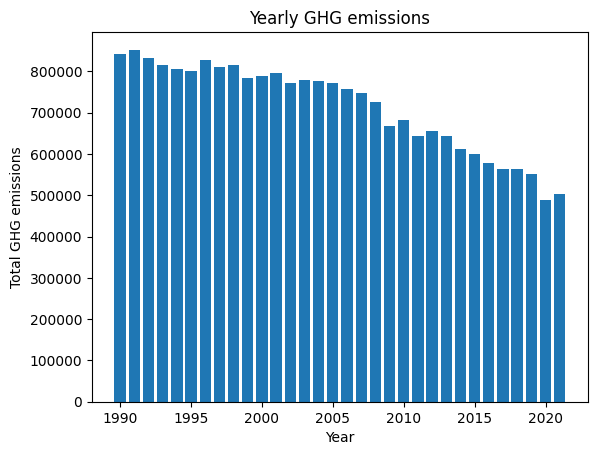

In [355]:
heights = total_ghg["Total greenhouse gas emissions"].to_list()
year = total_ghg["Year"].to_list()

plt.bar(year, heights)
plt.title("Yearly GHG emissions")
plt.xlabel("Year")
plt.ylabel("Total GHG emissions")
plt.show()

**Using a scatterplot**

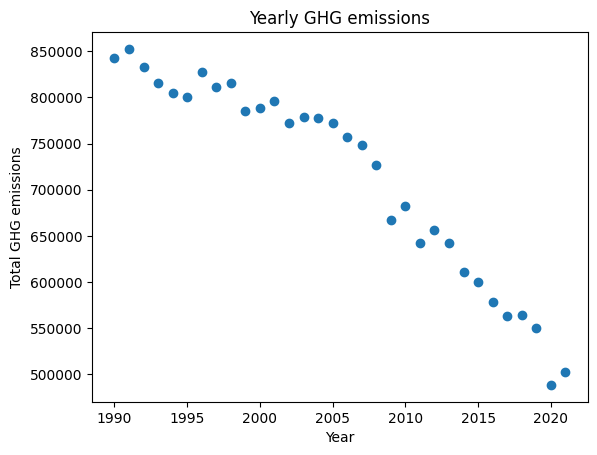

In [356]:
plt.scatter(year, heights)
plt.title("Yearly GHG emissions")
plt.xlabel("Year")
plt.ylabel("Total GHG emissions")
plt.show()

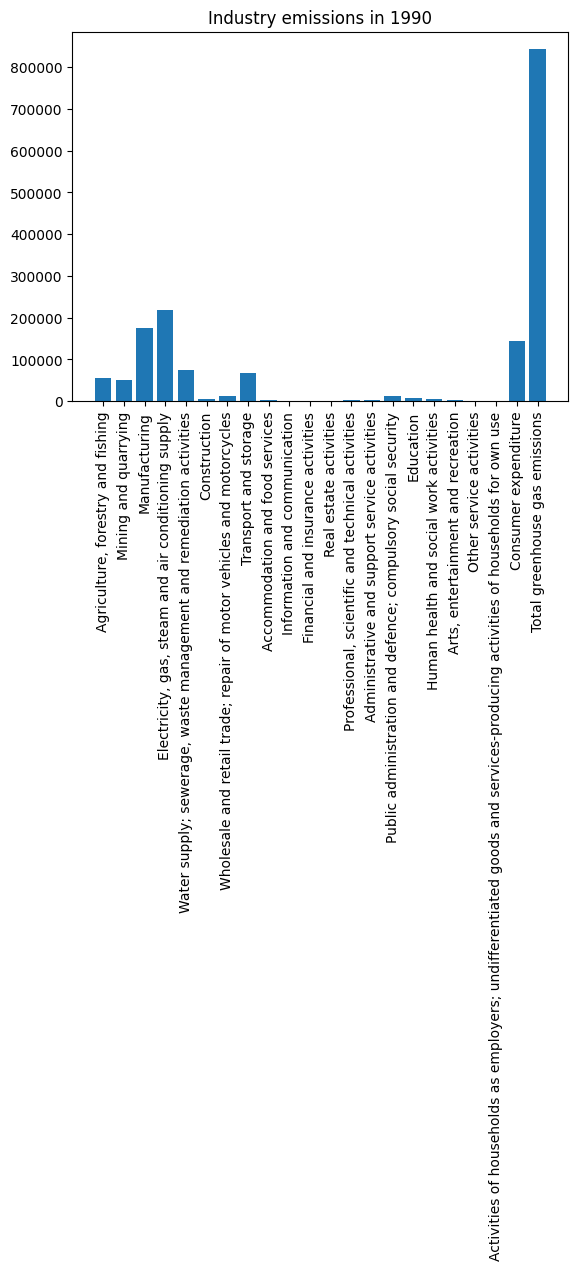

In [357]:
# plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
x = ghg_indus_grp["Industry"].to_list()
y = ghg_indus_grp[1990].to_list()

plt.bar(x, y)
plt.title("Industry emissions in 1990")
plt.xticks(x, rotation = "vertical")
plt.show()

In [380]:
ghg_indus_grp.drop(21, inplace=True)

/var/folders/45/qc4989c57zlbtkmp2cnnpcfc0000gn/T/ipykernel_98520/104097384.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Data Analysis

In [384]:
ghg_indus_grp.tail()

,Letter code,Industry,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
16,Q,Human health and social work activities,6151.5,6471.1,6828.4,6509.5,6587.7,6497.4,7042.7,6241.4,...,5427.2,5914.5,5289.7,5236.6,5444.0,5209.7,5343.8,5125.7,5109.3,5644.4
17,R,"Arts, entertainment and recreation",1797.7,1885.4,1712.9,1793.5,1739.3,1737.8,1793.2,1629.0,...,1068.9,1059.3,979.0,1011.2,1035.8,1022.2,1007.7,1002.6,880.0,954.8
18,S,Other service activities,1162.8,1251.9,1191.3,1249.9,1241.8,1272.8,1326.1,1216.1,...,989.6,995.8,916.5,978.8,1004.7,987.8,976.0,970.9,847.4,917.5
19,T,Activities of households as employers; undiffe...,76.3,75.1,76.8,78.2,81.9,83.4,81.6,84.3,...,47.3,41.9,46.4,42.5,51.6,46.2,47.6,47.7,31.5,40.7
20,U,Consumer expenditure,143893.7,152359.2,150676.4,155426.7,150210.3,144708.1,159770.4,153848.3,...,146065.1,148147.5,136001.5,139976.4,142422.1,141389.9,144174.1,140918.0,125152.7,134761.9


**Observations:**

There are **21** columns and **34** rows, including a **totals** row at the end.

The dataset is a time series dataset. The dependent variable is the "GHG Emsissions", which is going to be forecasted using "Year" as the dependent variable.

The "Year" range from **1990** to **2021**

In [385]:
ghg_indus_grp.duplicated().sum()

0

In [386]:
ghg_indus_grp[ghg_indus_grp.duplicated()]

,Letter code,Industry,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


**Observation:**
There are no duplicated values in the dataset

## Checking for data types

In [387]:
ghg_indus_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Letter code  21 non-null     object 
 1   Industry     21 non-null     object 
 2   1990         21 non-null     float64
 3   1991         21 non-null     float64
 4   1992         21 non-null     float64
 5   1993         21 non-null     float64
 6   1994         21 non-null     float64
 7   1995         21 non-null     float64
 8   1996         21 non-null     float64
 9   1997         21 non-null     float64
 10  1998         21 non-null     float64
 11  1999         21 non-null     float64
 12  2000         21 non-null     float64
 13  2001         21 non-null     float64
 14  2002         21 non-null     float64
 15  2003         21 non-null     float64
 16  2004         21 non-null     float64
 17  2005         21 non-null     float64
 18  2006         21 non-null     float64
 19  2007      

**Observation:**
The 1990 column is of **object** dtype

In [388]:
# changing 1990 object dtype to float64
ghg_indus_grp[1990] = ghg_indus_grp[1990].astype("float64")

/var/folders/45/qc4989c57zlbtkmp2cnnpcfc0000gn/T/ipykernel_98520/3409372793.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [389]:
ghg_indus_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Letter code  21 non-null     object 
 1   Industry     21 non-null     object 
 2   1990         21 non-null     float64
 3   1991         21 non-null     float64
 4   1992         21 non-null     float64
 5   1993         21 non-null     float64
 6   1994         21 non-null     float64
 7   1995         21 non-null     float64
 8   1996         21 non-null     float64
 9   1997         21 non-null     float64
 10  1998         21 non-null     float64
 11  1999         21 non-null     float64
 12  2000         21 non-null     float64
 13  2001         21 non-null     float64
 14  2002         21 non-null     float64
 15  2003         21 non-null     float64
 16  2004         21 non-null     float64
 17  2005         21 non-null     float64
 18  2006         21 non-null     float64
 19  2007      

**Observation:**
All the data types are all correct now

## Descriptive Analysis

In [390]:
table = ghg_indus_grp.describe().T

years = np.arange(1990, 2022).tolist()

table.reset_index(inplace=True)

kurtosis_values = []
for year in years:
    kurtosis_value = stats.kurtosis(ghg_indus_grp[year])
    kurtosis_values.append(kurtosis_value)

# res = {test_keys[i]: test_values[i] for i in range(len(test_keys))}
res = {years[i]: kurtosis_values[i] for i in range(len(years))}
res

# df["quality class"] = df["quality rating"].map(class_dict)
table["kurtosis value"] = table["index"].map(res)
table

,index,count,mean,std,min,25%,50%,75%,max,kurtosis value
0,1990,21.0,40140.214286,63833.684792,76.3,1797.7,6151.5,55978.4,217638.6,1.671055
1,1991,21.0,40597.923810,64202.103931,75.1,1885.4,6471.1,55808.5,214348.2,1.457049
2,1992,21.0,39686.528571,61769.957283,76.8,1712.9,6828.4,55510.4,202484.4,1.219562
3,1993,21.0,38851.842857,59492.887159,78.2,1793.5,6124.1,54725.4,185006.1,0.854549
4,1994,21.0,38329.947619,58790.253504,81.9,1739.3,6391.0,55487.3,180725.0,0.843962
5,1995,21.0,38137.242857,57879.744424,83.4,1737.8,6424.0,55391.7,178167.0,0.769957
6,1996,21.0,39390.180952,59600.863064,81.6,1793.2,6677.6,56706.2,177971.4,0.639874
7,1997,21.0,38634.080952,57683.659421,84.3,1629.0,6857.2,56132.4,166017.9,0.417512
8,1998,21.0,38853.361905,58049.720188,81.0,1550.4,6284.4,55674.8,170829.8,0.373083
9,1999,21.0,37385.671429,55588.152038,80.5,1483.6,5891.6,55680.5,163215.0,0.376083


**Observations:**

There are no missing values in dataset, as seen by all the numerical columns having equal amount of **count**

- The mean is greater than the median(50%), which indicates the data is skewed towards the right (positive skew). That is, (Q3-Q2 > Q2-Q1)
- The data is positively skewed
- The data has a positive kurtosis. Positive kurtosis (leptokurtic): More outliers, heavier tails, and a sharper peak. It tells about the shape of the data relative to a normal distribution.

**Conclusion:**
The data is positively skewed, leptokurtic and doesn't follow a normal distribution

## Checking for missing values (Null/NaN values)

In [391]:
ghg_indus_grp.isnull().sum()

Letter code    0
Industry       0
1990           0
1991           0
1992           0
1993           0
1994           0
1995           0
1996           0
1997           0
1998           0
1999           0
2000           0
2001           0
2002           0
2003           0
2004           0
2005           0
2006           0
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
dtype: int64

In [392]:
ghg_indus_grp.isna().sum()

Letter code    0
Industry       0
1990           0
1991           0
1992           0
1993           0
1994           0
1995           0
1996           0
1997           0
1998           0
1999           0
2000           0
2001           0
2002           0
2003           0
2004           0
2005           0
2006           0
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
dtype: int64

**Observation:**
There are no missing values in our dataset.

## Analysing correlation in dataset

In [393]:
ghg_indus_grp

,Letter code,Industry,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,A,"Agriculture, forestry and fishing",55978.4,55808.5,55510.4,54725.4,55487.3,55391.7,56706.2,56132.4,...,49671.9,48613.5,50571.8,51146.3,50534.4,51286.5,50557.7,50060.2,48500.2,50040.0
1,B,Mining and quarrying,50762.1,50877.2,51480.6,51092.0,44876.2,46739.8,46903.0,46035.6,...,22281.0,20953.7,20887.3,22201.0,21100.3,21031.1,20790.9,20736.3,19135.7,17181.4
2,C,Manufacturing,176067.9,177032.4,170118.3,165079.3,168003.9,166085.4,167363.6,166017.9,...,89688.4,92323.8,91436.1,88752.1,84312.4,85314.2,84017.6,83794.9,80927.2,81593.9
3,D,"Electricity, gas, steam and air conditioning s...",217638.6,214348.2,202484.4,185006.1,180725.0,178167.0,177971.4,164572.8,...,178586.4,169386.4,148443.9,132014.9,110073.4,99866.9,95829.7,89371.3,80310.9,86080.9
4,E,"Water supply; sewerage, waste management and r...",75232.5,76756.7,76870.8,77189.4,77556.2,78634.3,79137.0,77930.1,...,32164.5,29286.8,27392.9,27221.5,27117.4,28111.6,28407.5,27934.3,26552.4,26551.4
5,F,Construction,5786.8,5946.2,6058.3,6124.1,6391.0,6424.0,6677.6,6914.9,...,8533.9,8430.5,8629.3,9185.6,9761.4,9913.5,10021.1,9925.4,9150.9,10196.5
6,G,Wholesale and retail trade; repair of motor ve...,12127.0,12490.8,12324.7,12571.6,12970.1,13152.4,13486.1,13410.2,...,17650.2,17277.7,17099.7,17229.4,17487.3,17015.4,16542.8,16086.8,14267.5,14945.0
7,H,Transport and storage,66667.4,67119.0,68163.3,69528.8,70523.6,73415.5,79112.2,88152.6,...,83237.3,80131.4,85013.2,86923.5,89634.3,83261.5,88024.5,86628.1,62349.6,56753.8
8,I,Accommodation and food services,3139.2,3550.4,3270.5,3475.9,3453.5,3560.8,3742.7,3362.0,...,3598.9,3679.9,3270.0,3615.9,3708.0,3681.9,3641.4,3623.9,3112.6,3448.5
9,J,Information and communication,1199.4,1272.6,1241.8,1293.1,1336.3,1376.2,1379.5,1314.1,...,994.7,944.7,901.2,908.7,931.9,887.3,839.4,833.8,698.4,771.2


In [394]:
cols_to_drop = ["Letter code", "Industry"]
sample_df = ghg_indus_grp.drop(columns = cols_to_drop)
sample_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,55978.4,55808.5,55510.4,54725.4,55487.3,55391.7,56706.2,56132.4,55674.8,55680.5,...,49671.9,48613.5,50571.8,51146.3,50534.4,51286.5,50557.7,50060.2,48500.2,50040.0
1,50762.1,50877.2,51480.6,51092.0,44876.2,46739.8,46903.0,46035.6,44644.9,40727.5,...,22281.0,20953.7,20887.3,22201.0,21100.3,21031.1,20790.9,20736.3,19135.7,17181.4
2,176067.9,177032.4,170118.3,165079.3,168003.9,166085.4,167363.6,166017.9,158150.0,143983.1,...,89688.4,92323.8,91436.1,88752.1,84312.4,85314.2,84017.6,83794.9,80927.2,81593.9
3,217638.6,214348.2,202484.4,185006.1,180725.0,178167.0,177971.4,164572.8,170829.8,163215.0,...,178586.4,169386.4,148443.9,132014.9,110073.4,99866.9,95829.7,89371.3,80310.9,86080.9
4,75232.5,76756.7,76870.8,77189.4,77556.2,78634.3,79137.0,77930.1,78942.1,74187.8,...,32164.5,29286.8,27392.9,27221.5,27117.4,28111.6,28407.5,27934.3,26552.4,26551.4
5,5786.8,5946.2,6058.3,6124.1,6391.0,6424.0,6677.6,6914.9,7130.9,7402.4,...,8533.9,8430.5,8629.3,9185.6,9761.4,9913.5,10021.1,9925.4,9150.9,10196.5
6,12127.0,12490.8,12324.7,12571.6,12970.1,13152.4,13486.1,13410.2,13778.1,14343.3,...,17650.2,17277.7,17099.7,17229.4,17487.3,17015.4,16542.8,16086.8,14267.5,14945.0
7,66667.4,67119.0,68163.3,69528.8,70523.6,73415.5,79112.2,88152.6,93145.3,91479.0,...,83237.3,80131.4,85013.2,86923.5,89634.3,83261.5,88024.5,86628.1,62349.6,56753.8
8,3139.2,3550.4,3270.5,3475.9,3453.5,3560.8,3742.7,3362.0,3542.4,3692.0,...,3598.9,3679.9,3270.0,3615.9,3708.0,3681.9,3641.4,3623.9,3112.6,3448.5
9,1199.4,1272.6,1241.8,1293.1,1336.3,1376.2,1379.5,1314.1,1331.1,1379.7,...,994.7,944.7,901.2,908.7,931.9,887.3,839.4,833.8,698.4,771.2


In [395]:
sample_df.corr()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1990,1.000000,0.999512,0.998552,0.993933,0.993681,0.993618,0.988683,0.981604,0.981612,0.976206,...,0.945210,0.945498,0.942050,0.926418,0.895582,0.891156,0.876160,0.870126,0.893725,0.892904
1991,0.999512,1.000000,0.999637,0.996638,0.996202,0.995798,0.992250,0.985549,0.985428,0.980800,...,0.947782,0.949036,0.946004,0.932399,0.904162,0.900842,0.886541,0.880928,0.904484,0.904102
1992,0.998552,0.999637,1.000000,0.998375,0.997835,0.997570,0.994937,0.989185,0.989066,0.984941,...,0.948692,0.950379,0.948569,0.936795,0.910937,0.908346,0.894822,0.889668,0.912317,0.911319
1993,0.993933,0.996638,0.998375,1.000000,0.999430,0.998998,0.998683,0.994657,0.994083,0.991078,...,0.947940,0.951296,0.951719,0.944184,0.923894,0.923438,0.911541,0.907508,0.929187,0.927704
1994,0.993681,0.996202,0.997835,0.999430,1.000000,0.999733,0.998959,0.995817,0.994632,0.990975,...,0.943897,0.947524,0.949261,0.941719,0.921810,0.921688,0.909844,0.906166,0.928016,0.925734
1995,0.993618,0.995798,0.997570,0.998998,0.999733,1.000000,0.998749,0.996368,0.995254,0.991179,...,0.941988,0.945144,0.947839,0.940182,0.920197,0.919699,0.908020,0.904437,0.925189,0.921632
1996,0.988683,0.992250,0.994937,0.998683,0.998959,0.998749,1.000000,0.998425,0.997843,0.995581,...,0.948143,0.952463,0.955980,0.951445,0.935550,0.935981,0.925686,0.922563,0.941415,0.938273
1997,0.981604,0.985549,0.989185,0.994657,0.995817,0.996368,0.998425,1.000000,0.999008,0.996617,...,0.941921,0.946874,0.954419,0.952580,0.940627,0.941655,0.932949,0.930899,0.946324,0.940149
1998,0.981612,0.985428,0.989066,0.994083,0.994632,0.995254,0.997843,0.999008,1.000000,0.998960,...,0.953365,0.957173,0.963709,0.961241,0.948573,0.947933,0.939538,0.936750,0.949262,0.943336
1999,0.976206,0.980800,0.984941,0.991078,0.990975,0.991179,0.995581,0.996617,0.998960,1.000000,...,0.961667,0.965611,0.971859,0.970922,0.960262,0.959527,0.951933,0.948997,0.959647,0.954668


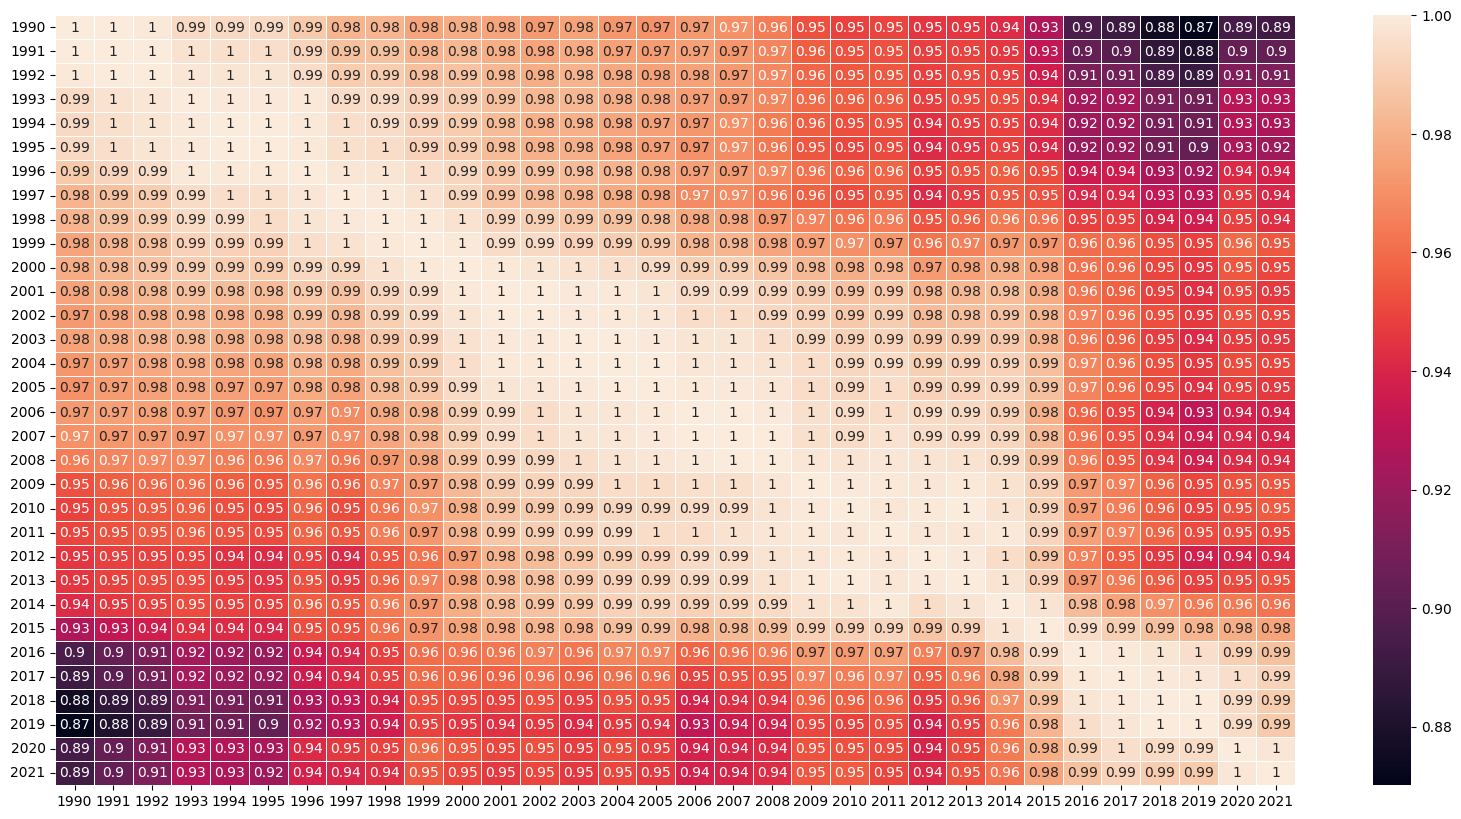

In [396]:
# correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(sample_df.corr(), annot=True, linewidths=0.5)

plt.show()

**Observation:**
The columns are highly correlated to each other. This means that there is a strong linear relationship between the variables (year and ghg emissions) represented by those columns.

## Outlier Detection

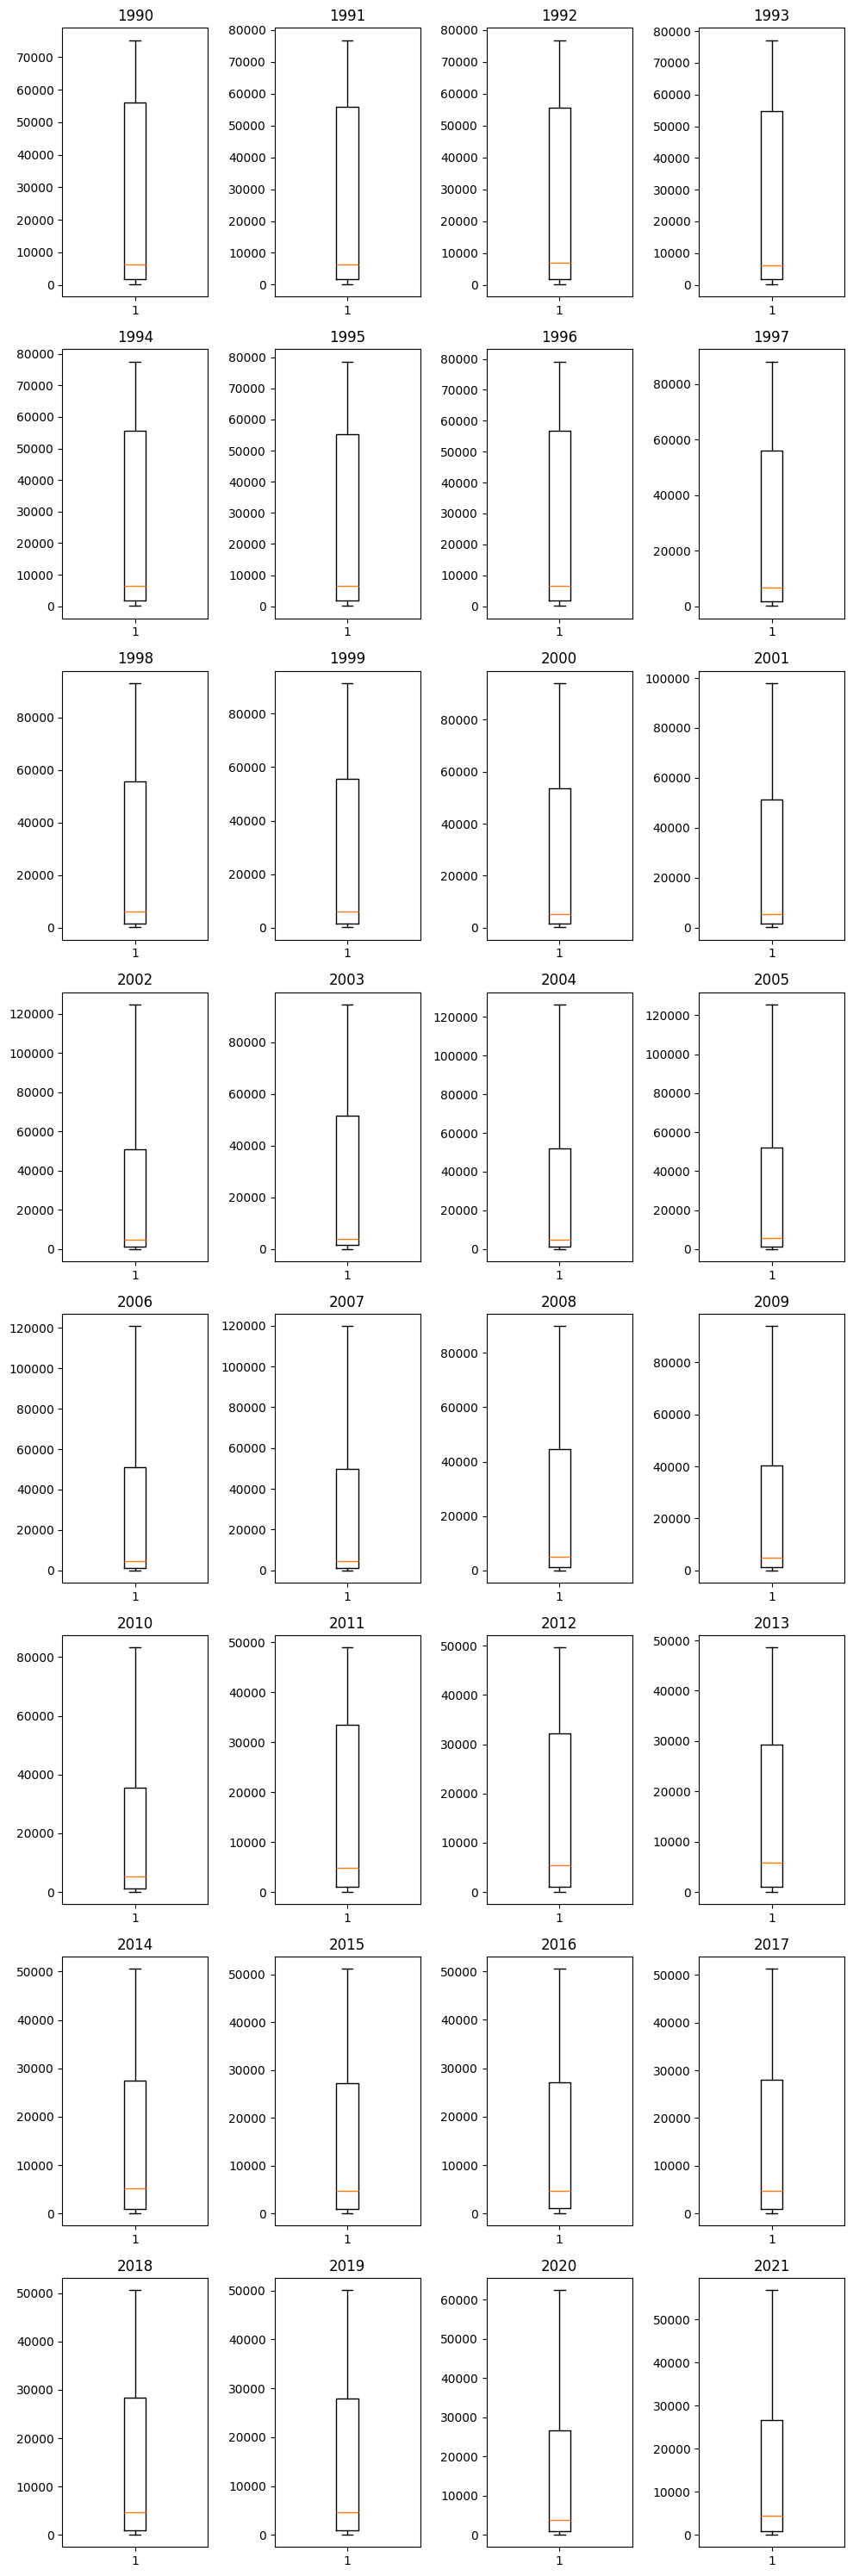

In [397]:
fig, axes = plt.subplots(figsize= (10,30), ncols=4, nrows=8)

for i, year in enumerate(years):
    row = i // 4
    col = i % 4
    
    data = sample_df[year]
    ax = axes[row, col]
    ax.boxplot(data, 0, "") # "" (empty quotes) mean not to show outliers. "gD" shows outlier in green diamond shape
    ax.set_title(year)

plt.tight_layout()

plt.show()

**Observation:**
The boxplots confirms that the variable is skewed. (Use IQR - interquartile range to find outliers)

**Z score for Outlier Detection**
Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

Z score = (x -mean) / std. deviation

A normal distribution is shown below and it is estimated that
68% of the data points lie between +/- 1 standard deviation.
95% of the data points lie between +/- 2 standard deviation
99.7% of the data points lie between +/- 3 standard deviation

![Standard Deviation](raw_data/Standard_Deviation_diagram.png)

In [399]:
for year in years:
    data = sample_df[year]
    mean = np.mean(data)
    std = np.std(data)
    print(f"mean of the Year {year} is {mean}")
    print(f"standard deviation is {std}")

mean of the Year 1990 is 40140.21428571428
standard deviation is 62295.29764473388
mean of the Year 1991 is 40597.9238095238
standard deviation is 62654.83790993246
mean of the Year 1992 is 39686.52857142858
standard deviation is 60281.30581847981
mean of the Year 1993 is 38851.84285714285
standard deviation is 58059.11291843669
mean of the Year 1994 is 38329.94761904761
standard deviation is 57373.412682901246
mean of the Year 1995 is 38137.24285714286
standard deviation is 56484.84680575062
mean of the Year 1996 is 39390.18095238094
standard deviation is 58164.48661206726
mean of the Year 1997 is 38634.08095238095
standard deviation is 56293.48743727879
mean of the Year 1998 is 38853.36190476191
standard deviation is 56650.72616637492
mean of the Year 1999 is 37385.67142857142
standard deviation is 54248.48162898766
mean of the Year 2000 is 37543.195238095235
standard deviation is 55340.73000477502
mean of the Year 2001 is 37910.92857142857
standard deviation is 56643.33667171186
mea

In [409]:
threshold = 3
outliers_by_year = {}

for year in years:
    data = sample_df[year]
    outliers = []
    for i in data:
        z = (i-mean)/std
    
        if z > threshold:
            outliers.append(i)
        elif z < -(threshold):
            outliers.append(i)
    outliers_by_year[year] = outliers

# Print the outliers
for year, outliers in outliers_by_year.items():
    print(f"The outliers in Year {year} are: {outliers}. There are {len(outliers)} outliers in Year {year}")

The outliers in Year 1990 are: [176067.9, 217638.6, 143893.7]. There are 3 outliers in Year 1990
The outliers in Year 1991 are: [177032.4, 214348.2, 152359.2]. There are 3 outliers in Year 1991
The outliers in Year 1992 are: [170118.3, 202484.4, 150676.4]. There are 3 outliers in Year 1992
The outliers in Year 1993 are: [165079.3, 185006.1, 155426.7]. There are 3 outliers in Year 1993
The outliers in Year 1994 are: [168003.9, 180725.0, 150210.3]. There are 3 outliers in Year 1994
The outliers in Year 1995 are: [166085.4, 178167.0, 144708.1]. There are 3 outliers in Year 1995
The outliers in Year 1996 are: [167363.6, 177971.4, 159770.4]. There are 3 outliers in Year 1996
The outliers in Year 1997 are: [166017.9, 164572.8, 153848.3]. There are 3 outliers in Year 1997
The outliers in Year 1998 are: [158150.0, 170829.8, 156346.7]. There are 3 outliers in Year 1998
The outliers in Year 1999 are: [143983.1, 163215.0, 157095.1]. There are 3 outliers in Year 1999
The outliers in Year 2000 are:

In [423]:
# Find the location of value a value
value = 217638.6
indices = ghg_indus_grp[ghg_indus_grp == value].stack().index

# Print the indices
for index in indices:
    print(f"Row Index: {index[0]}, Column: {index[1]}, Value: {ghg_indus_grp.loc[index[0], index[1]]}")

Row Index: 3, Column: 1990, Value: 217638.6


In [431]:
# Reshape the DataFrame to long format
ghg_indus_long = ghg_indus_grp.melt(id_vars=['Industry'], var_name='Year', value_name='Emissions')

# Find the rows where the value is located
condition = ghg_indus_long['Emissions'] == 191226.6
result_df = ghg_indus_long.loc[condition, ['Year', 'Industry']]

# Print the result
print(result_df)

     Year                                           Industry
297  2003  Electricity, gas, steam and air conditioning s...


In [426]:
ghg_indus_grp

,Letter code,Industry,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,A,"Agriculture, forestry and fishing",55978.4,55808.5,55510.4,54725.4,55487.3,55391.7,56706.2,56132.4,...,49671.9,48613.5,50571.8,51146.3,50534.4,51286.5,50557.7,50060.2,48500.2,50040.0
1,B,Mining and quarrying,50762.1,50877.2,51480.6,51092.0,44876.2,46739.8,46903.0,46035.6,...,22281.0,20953.7,20887.3,22201.0,21100.3,21031.1,20790.9,20736.3,19135.7,17181.4
2,C,Manufacturing,176067.9,177032.4,170118.3,165079.3,168003.9,166085.4,167363.6,166017.9,...,89688.4,92323.8,91436.1,88752.1,84312.4,85314.2,84017.6,83794.9,80927.2,81593.9
3,D,"Electricity, gas, steam and air conditioning s...",217638.6,214348.2,202484.4,185006.1,180725.0,178167.0,177971.4,164572.8,...,178586.4,169386.4,148443.9,132014.9,110073.4,99866.9,95829.7,89371.3,80310.9,86080.9
4,E,"Water supply; sewerage, waste management and r...",75232.5,76756.7,76870.8,77189.4,77556.2,78634.3,79137.0,77930.1,...,32164.5,29286.8,27392.9,27221.5,27117.4,28111.6,28407.5,27934.3,26552.4,26551.4
5,F,Construction,5786.8,5946.2,6058.3,6124.1,6391.0,6424.0,6677.6,6914.9,...,8533.9,8430.5,8629.3,9185.6,9761.4,9913.5,10021.1,9925.4,9150.9,10196.5
6,G,Wholesale and retail trade; repair of motor ve...,12127.0,12490.8,12324.7,12571.6,12970.1,13152.4,13486.1,13410.2,...,17650.2,17277.7,17099.7,17229.4,17487.3,17015.4,16542.8,16086.8,14267.5,14945.0
7,H,Transport and storage,66667.4,67119.0,68163.3,69528.8,70523.6,73415.5,79112.2,88152.6,...,83237.3,80131.4,85013.2,86923.5,89634.3,83261.5,88024.5,86628.1,62349.6,56753.8
8,I,Accommodation and food services,3139.2,3550.4,3270.5,3475.9,3453.5,3560.8,3742.7,3362.0,...,3598.9,3679.9,3270.0,3615.9,3708.0,3681.9,3641.4,3623.9,3112.6,3448.5
9,J,Information and communication,1199.4,1272.6,1241.8,1293.1,1336.3,1376.2,1379.5,1314.1,...,994.7,944.7,901.2,908.7,931.9,887.3,839.4,833.8,698.4,771.2
